In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns; sns.set()

# Notes of the above imports
* **%matplotlib inline**
%matplotlib inline is an example of a predefined magic function in Ipython. They are frequently used in interactive environments like jupyter notebook. %matplotlib inline makes your plot outputs appear and be stored within the notebook.
    
* **scipy**
This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

* **seaborn**
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

## Functions
* **make_blobs()**
The make_blobs() function can be used to generate blobs **(clusters)** of points with a Gaussian distribution. You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.

sklearn.datasets.make_blobs(n_samples=100, 
                            n_features=2, 
                            *, 
                            centers=None, 
                            cluster_std=1.0, 
                            center_box=(- 10.0, 10.0), 
                            shuffle=True, 
                            random_state=None, 
                            return_centers=False)
                            
* **plt.scatter()**
The scatter() method takes in the following parameters: 
 

* x_axis_data- An array containing x-axis data
* y_axis_data- An array containing y-axis data
* c- color of sequence of colors for markers
* s- marker size (can be scalar or array of size equal to size of x or y)
* marker- marker style
* cmap- cmap name(colormap) - autumn, winter, summer
* linewidths- width of marker border
* edgecolor- marker border color
* alpha- blending value, between 0 (transparent) and 1 (opaque)

X[:,0] ---> x-coordinates
Y[:,1] ---> y-coordinates

* **np.linspace()**


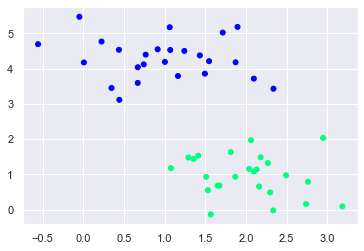

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, 
                  random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0],X[:, 1],c=y, s=25,cmap= 'winter');

# Support Vector Machines: Maximizing the Margin

(-1.0, 3.5)

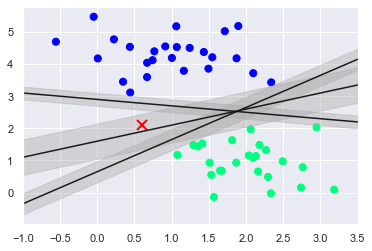

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap= 'winter')
plt.plot([0.6],[2.1],'x', color = 'red', markeredgewidth =2 , markersize = 10)

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit , '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1,3.5)

# Fitting a Support Vector Machine

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

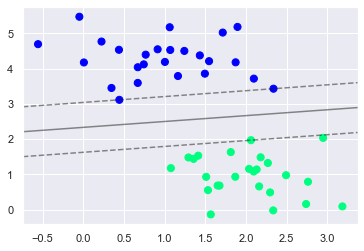

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

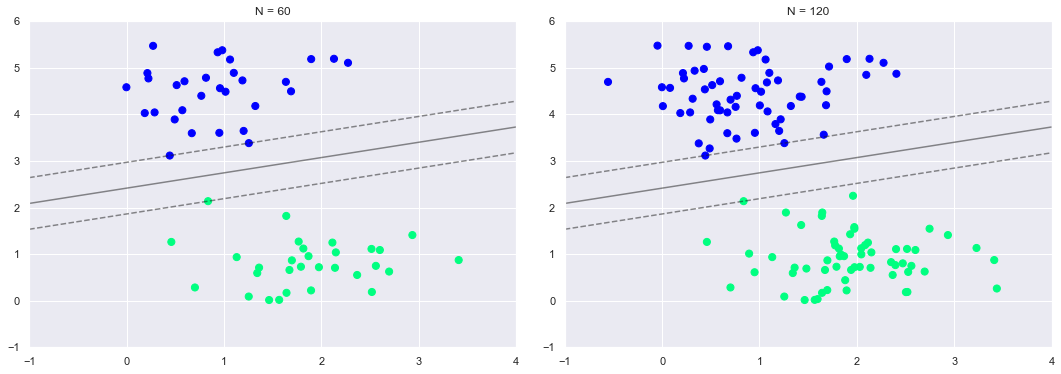

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…